In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import kalman

# パラメータ設定
T = 1000  # データの長さ
a = 1  # AR(1)過程のパラメータ
su = 0.01
sw = 0.000001

# N=1

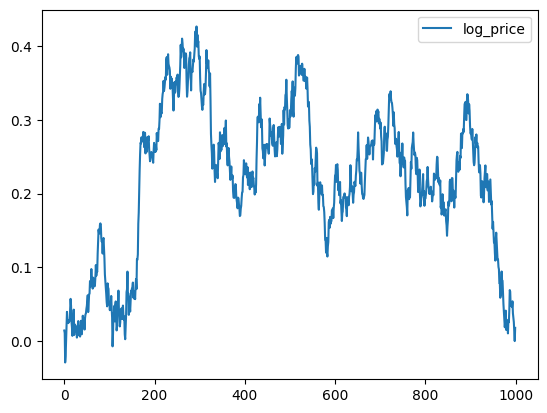

<Axes: >

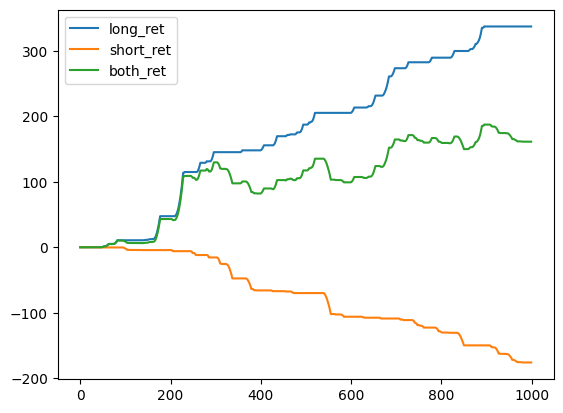

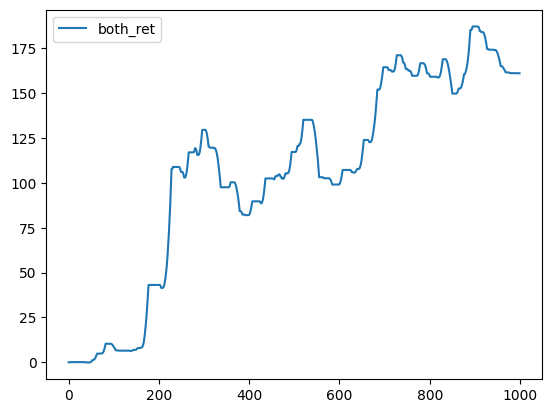

In [2]:
# データ生成
df = kalman.data_gen(a, su, sw, T, True)

# モデル初期化
kf = KalmanFilter(transition_matrices=[[1, 1], [0, 1]],
                  observation_matrices=[[1, 0]],
                  initial_state_mean=[0, 0],
                  initial_state_covariance=[[1, 0], [0, 1]],
                  observation_covariance=su,
                  transition_covariance=[[0, 0], [0, sw]])

# 予測
df = kalman.pred_confidence_interval(kf, df)

# トレード損益シミュレーション
df = kalman.calc_return(df)

# 可視化
df[["long_ret","short_ret", "both_ret"]].cumsum().plot()
df[["both_ret"]].cumsum().plot()

# N=100

[np.float64(148.10385589060266), np.float64(116.34290112924108), np.float64(144.425507952266), np.float64(50.88611176679581), np.float64(40.436119537166434)]
[np.float64(133.1430601324066), np.float64(492.31530930189865), np.float64(364.07968271549146), np.float64(118.43964368515884), np.float64(103.73650516979113)]
[np.float64(135.06604103613478), np.float64(78.87722806569809), np.float64(137.38423081108493), np.float64(95.60193535388385), np.float64(92.48302409039914)]
[np.float64(69.0271905908735), np.float64(160.76911543235786), np.float64(189.07001686914174), np.float64(139.91043189239866), np.float64(219.66700429077355)]
[np.float64(141.62036505129248), np.float64(102.87344309134154), np.float64(457.12111360665324), np.float64(94.44129068994918), np.float64(163.71562860084072)]
[np.float64(137.12483092086782), np.float64(341.89481285101067), np.float64(106.53515958810188), np.float64(138.90999358380563), np.float64(313.9546962069892)]
[np.float64(148.52272375562669), np.float64(1

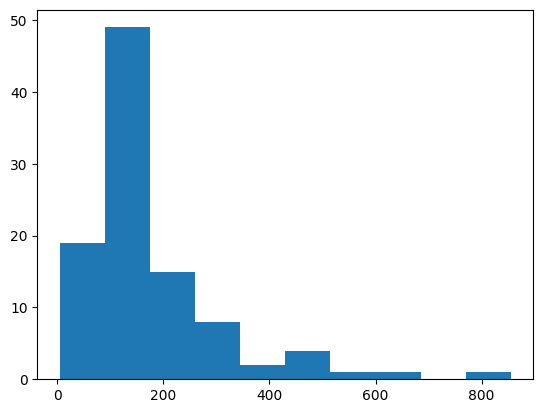

In [6]:
profits = []
for i in range(100):
    # データ生成
    df = kalman.data_gen(a, su, sw, T, False)

    # モデル初期化
    kf = KalmanFilter(transition_matrices=[[1, 1], [0, 1]],
                    observation_matrices=[[1, 0]],
                    initial_state_mean=[0, 0],
                    initial_state_covariance=[[1, 0], [0, 1]],
                    observation_covariance=su,
                    transition_covariance=[[0, 0], [0, sw]])

    # 予測
    df = kalman.pred_confidence_interval(kf, df)

    # トレード損益シミュレーション
    df = kalman.calc_return(df)
    profits.append(df["both_ret"].sum())
    
    batch = 5
    if (i+1)%batch==0:
        print(profits[-batch:])

# 可視化
plt.hist(profits)
plt.show()

In [13]:
(np.array(profits)<0).mean()

np.float64(0.0)

In [14]:
np.min(profits)

np.float64(4.9400099056722695)